In [2]:
!git clone https://github.com/quangminh141005/ASL_Detection.git

Cloning into 'ASL_Detection'...
remote: Enumerating objects: 2582, done.
remote: Counting objects: 100% (2582/2582), done.
remote: Compressing objects: 100% (2576/2576), done.
remote: Total 2582 (delta 10), reused 2567 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (2582/2582), 27.97 MiB | 13.57 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [1]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os

In [3]:
DATASET_PATH = '/content/ASL_Detection/Data/asl_dataset'

IMAGE_SIZE = 64

X = []
y = []

label_map = {}
label_counter = 0

for folder_name in os.listdir(DATASET_PATH):
  folder_path = os.path.join(DATASET_PATH, folder_name)
  if os.path.isdir(folder_path):
    if folder_name not in label_map:
      label_map[folder_name] = label_counter
      label_counter += 1
    label = label_map[folder_name]

    for img_file in os.listdir(folder_path):
      img_path = os.path.join(folder_path, img_file)
      try:
        img = cv2.imread(img_path)
        img = cv2.resize(img ,(IMAGE_SIZE, IMAGE_SIZE))
        img = img/255.
        X.append(img)
        y.append(label)
      except Exception as e:
        print("Error loading file: ", e)

X = np.array(X)
y = np.array(y)

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
ASL_model_advance = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=36, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
ASL_model_advance.compile(optimizer='SGD',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

ASL_history = ASL_model_advance.fit(X_train, y_train, epochs=20,
                        validation_data=(X_test, y_test))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.2082 - loss: 3.3082 - val_accuracy: 0.1213 - val_loss: 3.4514
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6298 - loss: 1.2262 - val_accuracy: 0.1491 - val_loss: 3.2538
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7867 - loss: 0.7022 - val_accuracy: 0.2087 - val_loss: 2.9437
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8433 - loss: 0.5078 - val_accuracy: 0.4374 - val_loss: 2.3043
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8685 - loss: 0.4109 - val_accuracy: 0.6998 - val_loss: 1.4517
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9008 - loss: 0.2996 - val_accuracy: 0.8807 - val_loss: 0.8509
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9224 - loss: 0.2547 - val_accuracy: 0.9264 - val_loss: 0.4329
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9344 - loss: 0.2177 - val_accuracy: 0.9324 - val_lo

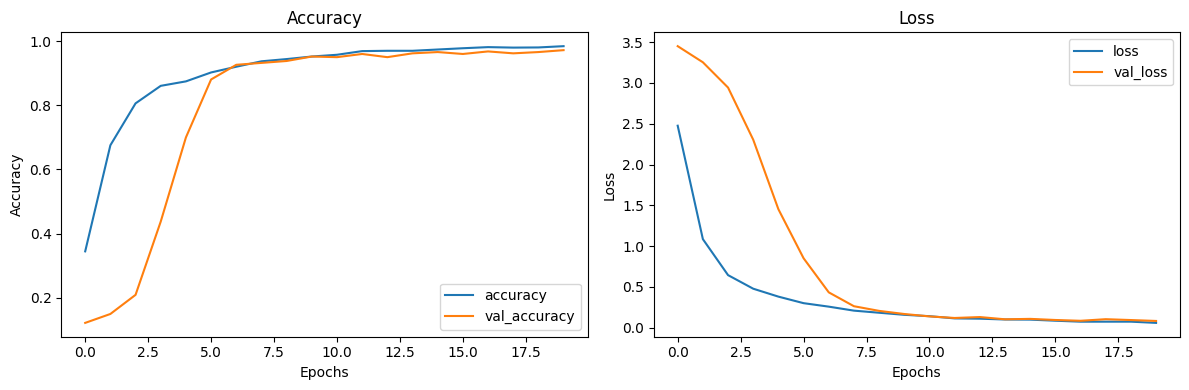

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot first graph
axs[0].plot(ASL_history.history['accuracy'], label='accuracy')
axs[0].plot(ASL_history.history['val_accuracy'], label='val_accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[0].set_title('Accuracy')

axs[1].plot(ASL_history.history['loss'], label='loss')
axs[1].plot(ASL_history.history['val_loss'], label='val_loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].set_title('Loss')

plt.tight_layout()
plt.show()

In [11]:
metrics = ASL_history.history
final_metrics = {key: values[-1] for key, values in metrics.items()}

print(final_metrics)

{'accuracy': 0.9845924377441406, 'loss': 0.058474067598581314, 'val_accuracy': 0.9721670150756836, 'val_loss': 0.08207602798938751}


In [12]:
# Save metrics value to JSON file
import json
from pathlib import Path

final_metrics["model_name"] = "nguyen quang minh's model"

results_path = Path("/content/ASL_Detection/Results")/"nqm_model.json"
results_path.parent.mkdir(exist_ok=True)

with open(results_path, "w") as f:
  json.dump(final_metrics, f, indent=4)

print(f"Saved results to {results_path}")


Saved results to /content/ASL_Detection/Results/nqm_model.json


In [ ]:
git config --global user.email "minhnq.23bi14288@usth.edu.vn"
  git config --global user.name "quangminh141005"